In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
mc=df.copy()
mc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mc.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
mc.shape

(200, 5)

In [7]:
mc.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
print('No of total rows    =', mc.shape[0],'\n''No of total columns =',mc.shape[1])

No of total rows    = 200 
No of total columns = 5


In [9]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
mc.columns = mc.columns.str.replace(' ','_')

In [11]:
mc.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)',
       'Spending_Score_(1-100)'],
      dtype='object')

In [12]:
mc.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual_Income_(k$)        0
Spending_Score_(1-100)    0
dtype: int64

In [13]:
mc.isnull().sum().sum()

0

In [14]:
mc.size

1000

In [15]:
pd.options.display.float_format = '{:.3f}'.format
mc.describe(percentiles=[.25,0.50,0.75,0.90])

,CustomerID,Age,Annual_Income_(k$),Spending_Score_(1-100)
count,200.000,200.000,200.000,200.000
mean,100.500,38.850,60.560,50.200
std,57.879,13.969,26.265,25.824
min,1.000,18.000,15.000,1.000
25%,50.750,28.750,41.500,34.750
50%,100.500,36.000,61.500,50.000
75%,150.250,49.000,78.000,73.000
90%,180.100,59.100,93.400,87.100
max,200.000,70.000,137.000,99.000


In [16]:
mc.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)',
       'Spending_Score_(1-100)'],
      dtype='object')

In [17]:
mc['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [18]:
mc['Age'].value_counts(ascending=True)

69     1
64     1
56     1
55     1
41     2
63     2
70     2
51     2
57     2
65     2
42     2
53     2
52     2
26     2
44     2
66     2
58     2
25     3
43     3
22     3
33     3
37     3
39     3
46     3
60     3
68     3
45     3
24     4
28     4
54     4
18     4
59     4
67     4
29     5
50     5
48     5
20     5
21     5
34     5
38     6
36     6
47     6
27     6
40     6
23     6
49     7
30     7
31     8
19     8
35     9
32    11
Name: Age, dtype: int64

In [19]:
mc['Annual_Income_(k$)'].value_counts(ascending=True)

15      2
58      2
59      2
126     2
61      2
64      2
69      2
70      2
72      2
74      2
75      2
57      2
76      2
81      2
85      2
86      2
93      2
97      2
98      2
99      2
101     2
113     2
120     2
79      2
50      2
137     2
18      2
24      2
25      2
29      2
30      2
49      2
34      2
37      2
23      2
38      2
21      2
16      2
17      2
47      2
42      2
44      2
67      4
88      4
20      4
28      4
46      4
77      4
65      4
43      4
73      4
103     4
40      4
39      4
19      4
33      4
48      6
71      6
63      6
62      6
87      6
60      6
78     12
54     12
Name: Annual_Income_(k$), dtype: int64

In [20]:
mc['Spending_Score_(1-100)'].value_counts(ascending=True)

18    1
44    1
45    1
11    1
9     1
65    1
34    1
71    1
7     1
12    1
31    1
22    1
8     1
82    1
98    1
89    1
53    1
23    1
85    1
78    1
27    1
99    1
63    1
68    1
66    1
3     1
94    1
24    1
1     2
57    2
58    2
91    2
95    2
86    2
10    2
93    2
97    2
74    2
83    2
20    2
16    2
69    2
90    2
39    2
29    2
81    2
6     2
32    2
61    2
87    2
4     2
76    2
72    2
26    2
79    2
28    2
36    2
51    3
17    3
13    3
92    3
43    3
60    3
54    3
77    3
49    3
88    3
15    3
14    4
40    4
56    4
5     4
47    4
41    4
35    5
75    5
52    5
48    5
59    5
50    5
46    6
73    6
55    7
42    8
Name: Spending_Score_(1-100), dtype: int64

In [21]:
mc.drop('CustomerID',axis=1,inplace=True)

In [22]:
mc.head()

,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [23]:
mc.shape

(200, 4)

In [24]:
mc.skew().sort_values(ascending=False)

Age                       0.486
Annual_Income_(k$)        0.322
Spending_Score_(1-100)   -0.047
dtype: float64

In [25]:
def univariateAnalysis_numeric(column,nbins):
    
    fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(16,5))
    plt.grid(True)
    print("Distribution of - " + column)
    print("----------------------------------")
    
    sns.distplot(mc[column], kde=True, color = 'b', ax=ax1);
    sns.boxplot(x = mc[column], data = mc, orient = 'v', ax = ax2)
    ax3.hist(mc[column])
    
    
    ax1.tick_params(labelsize = 15)
    ax1.set_title('Distplot - of - '+ column, fontsize = 15)
    
    ax2.set_title('Boxplot - of - '+ column, fontsize = 15)
    ax2.tick_params(labelsize=15)
    
    ax3.set_title('Histogram - of - '+ column, fontsize = 15)
    ax3.tick_params(labelsize = 15)
    
    
    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()
    plt.show();

Distribution of - Age
----------------------------------


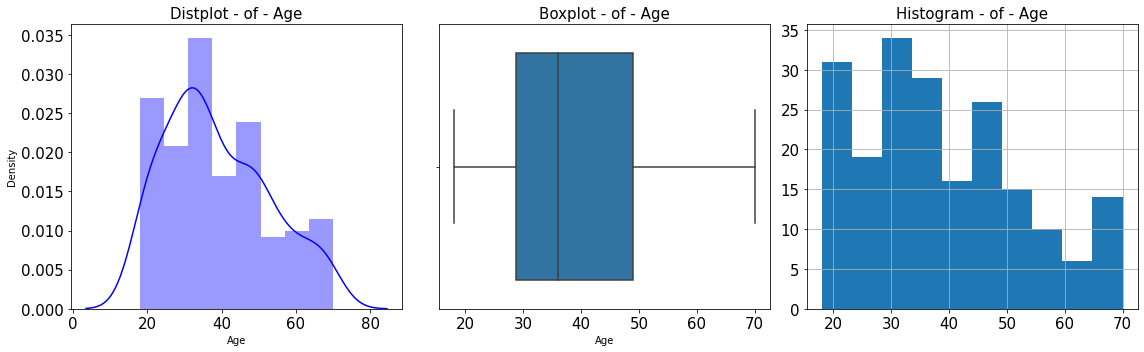

Distribution of - Annual_Income_(k$)
----------------------------------


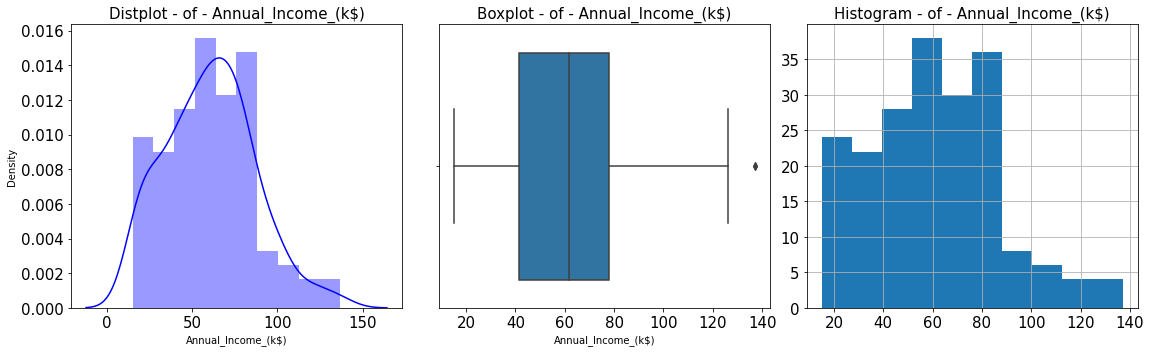

Distribution of - Spending_Score_(1-100)
----------------------------------


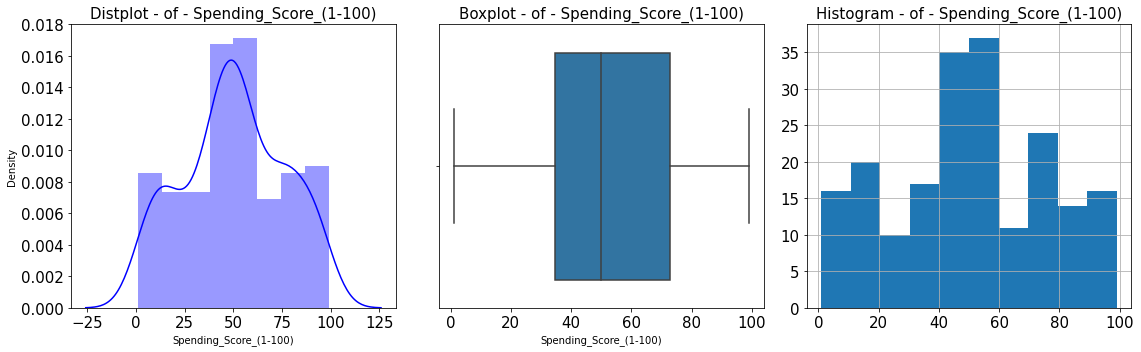

In [26]:
mc_numeric = mc.select_dtypes(include = ['float64', 'int64'])
mc_numeric_cols = list(mc_numeric.columns.values)
len(mc_numeric_cols)
for x in mc_numeric_cols:
    univariateAnalysis_numeric(x,30);

In [27]:
mc['Age'].max()

70

In [28]:
mc['Age'].min()

18

In [29]:
age1=[10,20,30,40,50,60,70,80,90,100]

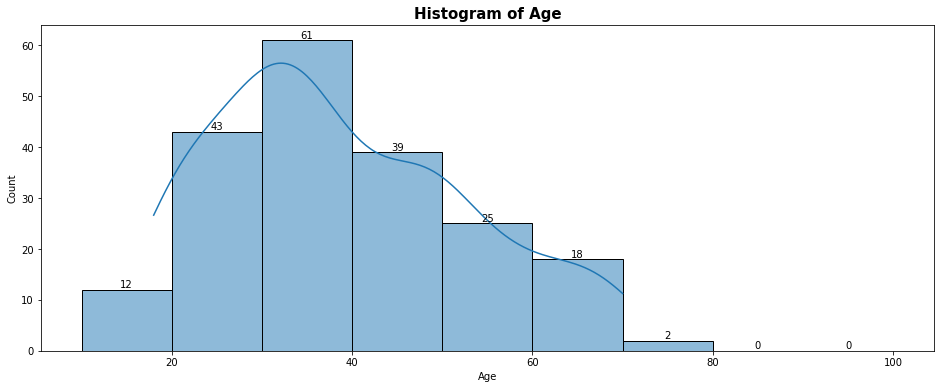

In [30]:
plt.figure(figsize=(16,6))
ax=sns.histplot(data=mc, x='Age',bins = age1, kde=True)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Histogram of Age', fontsize=15, fontweight='bold')
plt.show()

In [31]:
mc['Spending_Score_(1-100)'].max()

99

In [32]:
mc['Spending_Score_(1-100)'].min()

1

In [33]:
ss=[0,10,20,30,40,50,60,70,80,90,100]

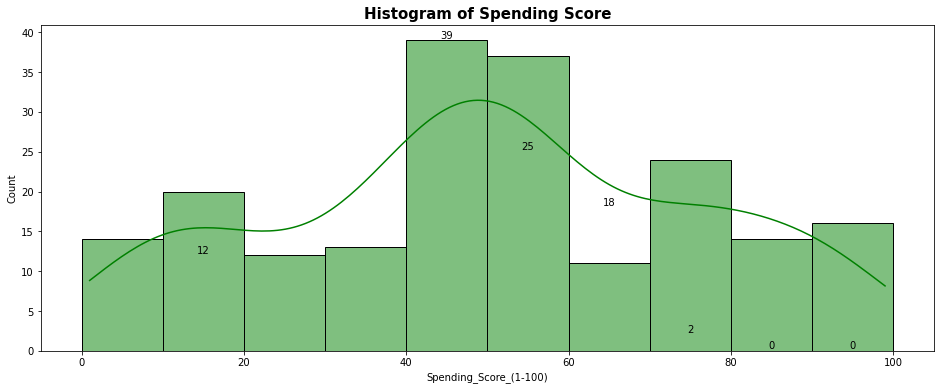

In [34]:
plt.figure(figsize=(16,6))
sx=sns.histplot(data=mc, x='Spending_Score_(1-100)',bins = ss, kde=True,color='green')
for container in ax.containers:
    sx.bar_label(container)
plt.title('Histogram of Spending Score', fontsize=15, fontweight='bold')
plt.show()

In [35]:
mc.columns

Index(['Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)'], dtype='object')

In [36]:
mc['Annual_Income_(k$)'].max()

137

In [37]:
mc['Annual_Income_(k$)'].min()

15

In [38]:
ai=[15,20,30,50,70,90,110,125,130,150]

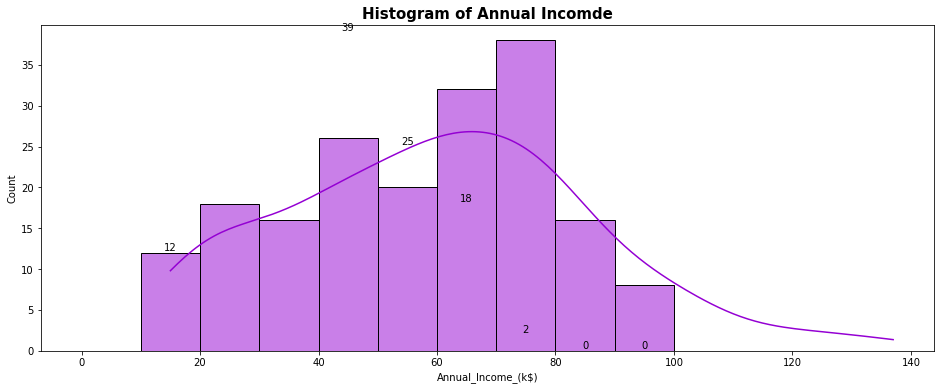

In [39]:
plt.figure(figsize=(16,6))
sx=sns.histplot(data=mc, x='Annual_Income_(k$)',bins = ss, kde=True,color='darkviolet')
for container in ax.containers:
    sx.bar_label(container)
plt.title('Histogram of Annual Incomde', fontsize=15, fontweight='bold')
plt.show()

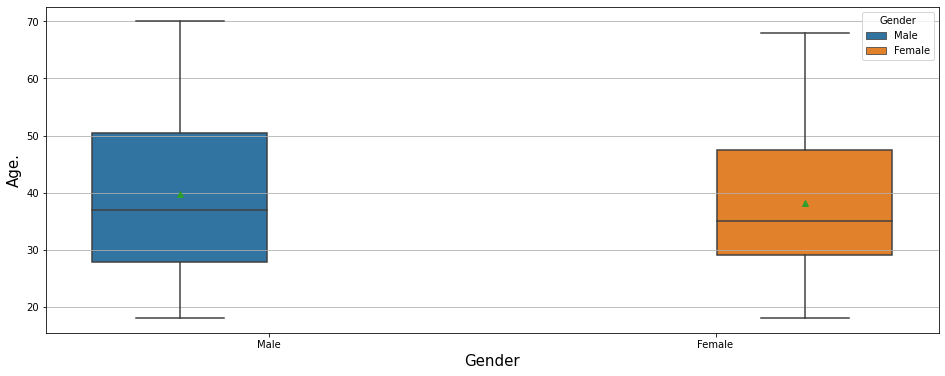

In [40]:
plt.figure(figsize=(16,6))
plt.grid(True)
sns.boxplot(x = mc['Gender'], y= mc['Age'], data = mc, orient ='v', showmeans=True, hue='Gender')
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Age.", fontsize=15)
plt.show()

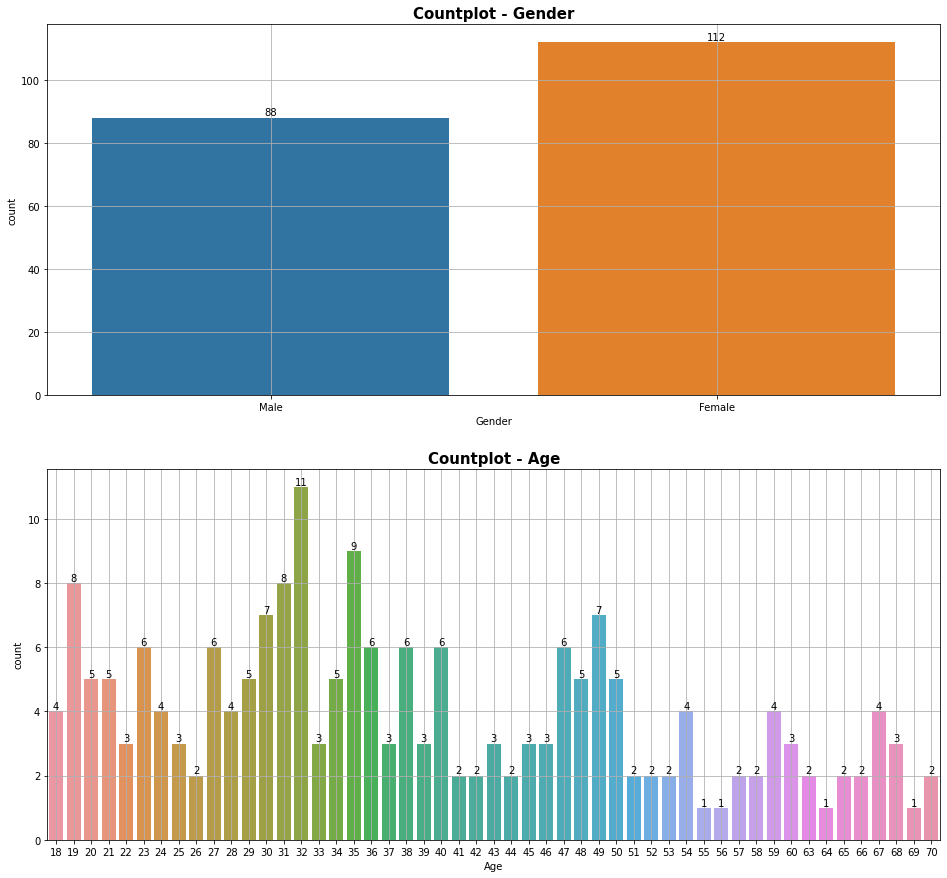

In [42]:
plt.subplots(2,1,figsize=(16,15))

plt.subplot(2,1,1)
ax6 = sns.countplot(data=mc, x= 'Gender')
for container in ax6.containers:
    ax6.bar_label(container)
plt.title('Countplot - Gender', fontsize=15, fontweight='bold')
plt.grid(True)

plt.subplot(2,1,2)
ax7=sns.countplot(data=mc,  x='Age', orient='h')
for container in ax7.containers:
    ax7.bar_label(container)
plt.title('Countplot - Age', fontsize=15, fontweight='bold')

plt.grid(True)
plt.show()

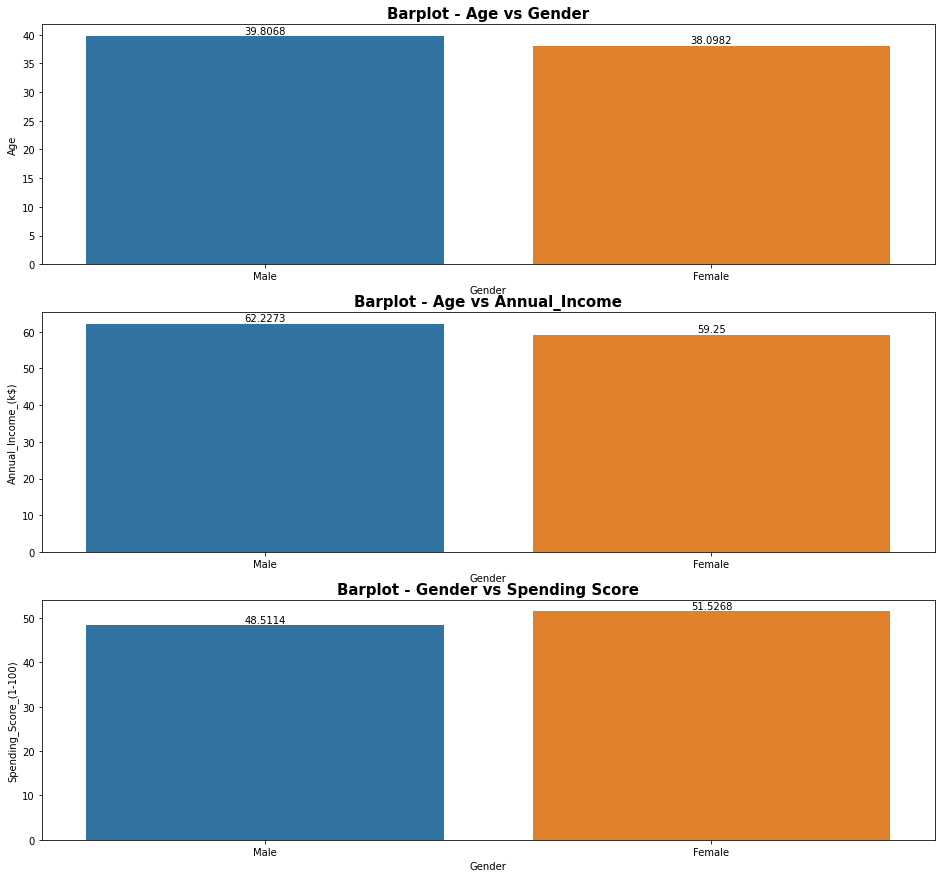

In [43]:
plt.subplots(3,1,figsize=(16,15))

plt.subplot(3,1,1)
ax3 = sns.barplot(data=mc, y='Age', x= 'Gender', ci=None)
for container in ax3.containers:
    ax3.bar_label(container)
plt.title('Barplot - Age vs Gender', fontsize=15, fontweight='bold')

plt.subplot(3,1,2)
ax4= sns.barplot(data=mc, y= 'Annual_Income_(k$)', x='Gender', ci=None)
for container in ax4.containers:
    ax4.bar_label(container)
plt.title('Barplot - Age vs Annual_Income', fontsize=15, fontweight='bold')

plt.subplot(3,1,3)
ax5 = sns.barplot(data=mc, x='Gender', y = 'Spending_Score_(1-100)', ci=None)
for container in ax5.containers:
    ax5.bar_label(container)
plt.title('Barplot - Gender vs Spending Score', fontsize=15, fontweight='bold')

plt.show()

In [44]:
mc.columns

Index(['Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)'], dtype='object')

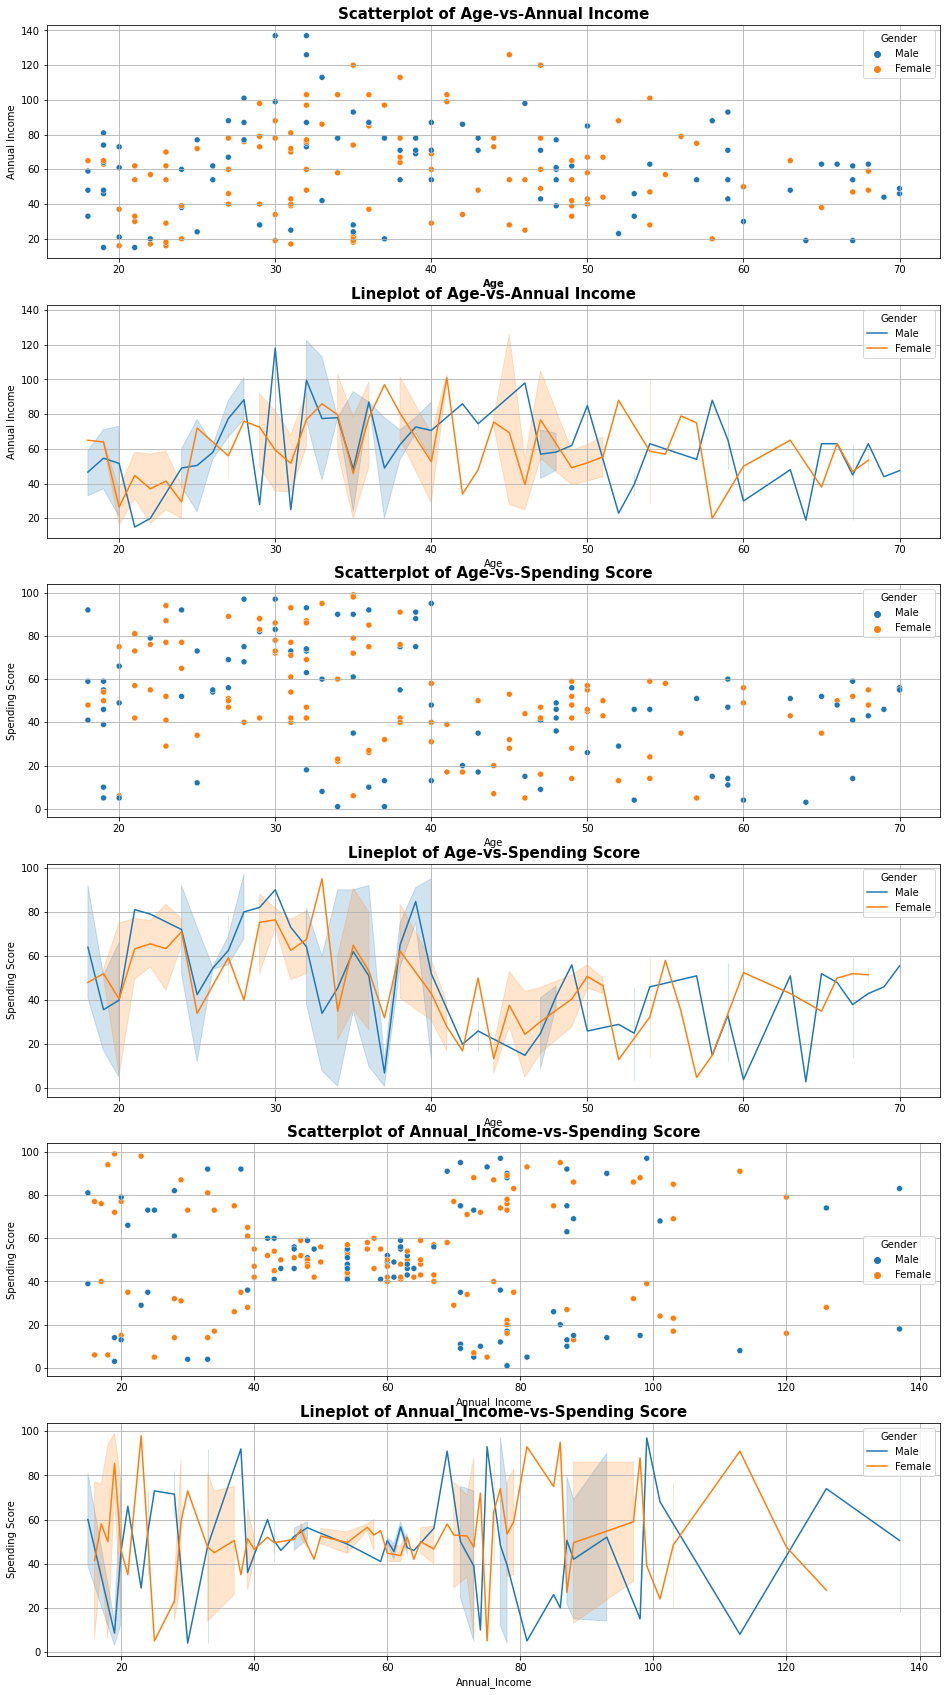

In [45]:

plt.subplots(6,1,figsize=(16,30))


plt.subplot(6,1,1)
plt.xlabel('Age', fontsize=10,fontweight='bold')
plt.ylabel('Annual Income', fontsize=10)
sns.scatterplot(data=mc, x='Age', y='Annual_Income_(k$)', hue='Gender')
plt.title('Scatterplot of Age-vs-Annual Income', fontsize=15, fontweight='bold')
plt.grid(True)


plt.subplot(6,1,2)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Annual Income', fontsize=10)
sns.lineplot(data=mc, x='Age',y='Annual_Income_(k$)', hue='Gender')
plt.title('Lineplot of Age-vs-Annual Income', fontsize=15, fontweight='bold')
plt.grid(True)


plt.subplot(6,1,3)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Spending Score', fontsize=10)
sns.scatterplot(data=mc, x='Age', y='Spending_Score_(1-100)', hue='Gender')
plt.title('Scatterplot of Age-vs-Spending Score', fontsize=15, fontweight='bold')
plt.grid(True)


plt.subplot(6,1,4)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Spending Score', fontsize=10)
sns.lineplot(data=mc, x='Age',y='Spending_Score_(1-100)', hue='Gender')
plt.title('Lineplot of Age-vs-Spending Score', fontsize=15, fontweight='bold')
plt.grid(True)

plt.subplot(6,1,5)
plt.xlabel('Annual_Income', fontsize=10)
plt.ylabel('Spending Score', fontsize=10)
sns.scatterplot(data=mc, x='Annual_Income_(k$)', y='Spending_Score_(1-100)', hue='Gender')
plt.title('Scatterplot of Annual_Income-vs-Spending Score', fontsize=15, fontweight='bold')
plt.grid(True)

plt.subplot(6,1,6)
plt.xlabel('Annual_Income', fontsize=10)
plt.ylabel('Spending Score', fontsize=10)
sns.lineplot(data=mc, x='Annual_Income_(k$)',y='Spending_Score_(1-100)', hue='Gender')
plt.title('Lineplot of Annual_Income-vs-Spending Score', fontsize=15, fontweight='bold')
plt.grid(True)


plt.show()

In [46]:
mc.dtypes

Gender                    object
Age                        int64
Annual_Income_(k$)         int64
Spending_Score_(1-100)     int64
dtype: object

* Now we need to convert the 'Gender' column into 'Categorial' column, as for modeling there should not be any Object type data in dataset
* Then later we will Encode the Categorical data using Label Encoding method.

In [47]:
mc['Gender'] = mc['Gender'].astype('category')

In [48]:
mc.dtypes

Gender                    category
Age                          int64
Annual_Income_(k$)           int64
Spending_Score_(1-100)       int64
dtype: object

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
label_encoder = LabelEncoder()
mc['Gender'] = label_encoder.fit_transform(mc['Gender'])

In [51]:
mc['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

0 - has been encoded as 'Female'

1 - has been encoded as 'Male'

In [52]:
mc.dtypes

Gender                    int32
Age                       int64
Annual_Income_(k$)        int64
Spending_Score_(1-100)    int64
dtype: object

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
mc.describe()

,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
count,200.000,200.000,200.000,200.000
mean,0.440,38.850,60.560,50.200
std,0.498,13.969,26.265,25.824
min,0.000,18.000,15.000,1.000
25%,0.000,28.750,41.500,34.750
50%,0.000,36.000,61.500,50.000
75%,1.000,49.000,78.000,73.000
max,1.000,70.000,137.000,99.000


In [55]:
stdscaler = StandardScaler()
metrics = ['int32','int64']
new_data = mc.select_dtypes(include=metrics)
scaled_new_data = pd.DataFrame(stdscaler.fit_transform(new_data.to_numpy()), columns=new_data.columns)
scaled_new_data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1.128,-1.425,-1.739,-0.435
1,1.128,-1.281,-1.739,1.196
2,-0.886,-1.353,-1.701,-1.716
3,-0.886,-1.138,-1.701,1.040
4,-0.886,-0.563,-1.663,-0.396


In [56]:
scaled_new_data.describe()

,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
count,200.000,200.000,200.000,200.000
mean,0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-0.886,-1.496,-1.739,-1.910
25%,-0.886,-0.725,-0.728,-0.600
50%,-0.886,-0.205,0.036,-0.008
75%,1.128,0.728,0.666,0.885
max,1.128,2.236,2.918,1.894


In [57]:
scaled_new_data.corr()

,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
Gender,1.000,0.061,0.056,-0.058
Age,0.061,1.000,-0.012,-0.327
Annual_Income_(k$),0.056,-0.012,1.000,0.010
Spending_Score_(1-100),-0.058,-0.327,0.010,1.000


In [58]:
correlated = scaled_new_data.corr().abs() # Since there may be positive as well as -ve correlation
sort = correlated.unstack() # 
sorted_data = sort.sort_values(ascending=False) # Sorting according to the correlation
sorted_data=sorted_data[(sorted_data<1) & (sorted_data>0.003)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
sorted_data.columns = ['correlation']
sorted_data

correlation
Age                Spending_Score_(1-100)        0.327
Gender             Age                           0.061
                   Spending_Score_(1-100)        0.058
                   Annual_Income_(k$)            0.056
Age                Annual_Income_(k$)            0.012
Annual_Income_(k$) Spending_Score_(1-100)        0.010

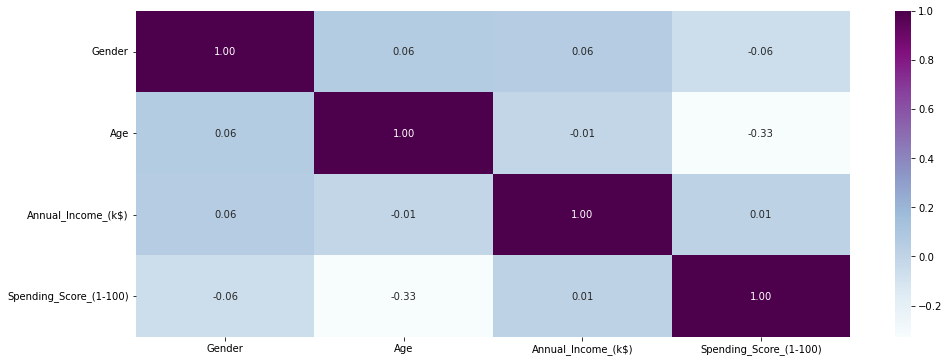

In [59]:
plt.figure(figsize = (16,6))
sns.heatmap(scaled_new_data.corr(), annot=True,fmt='.2f',cmap='BuPu');

# Scatterplot for PCA :

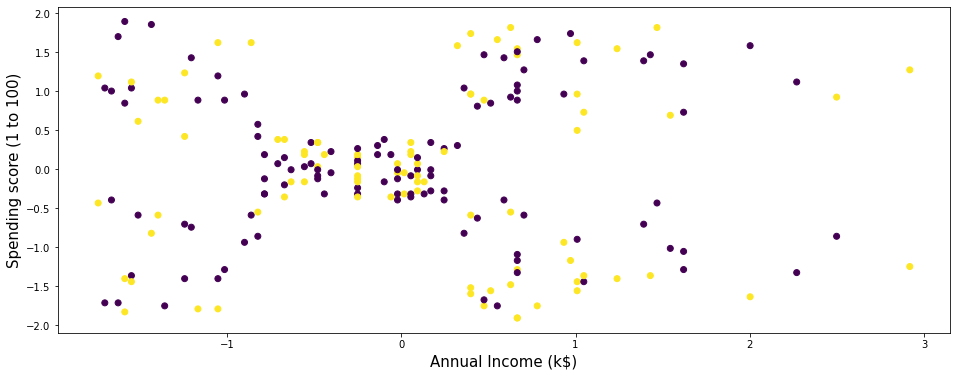

In [60]:
plt.figure(figsize=(16,6))
plt.scatter(scaled_new_data.iloc[:,2],scaled_new_data.iloc[:,3],c=scaled_new_data['Gender'])
plt.ylabel('Spending score (1 to 100)', fontsize=15)
plt.xlabel('Annual Income (k$)', fontsize=15)
plt.show()

# Building Of Model: 

### The below 3 Models will be implemented
### 1. K-Means Clustering Model
### 2. DBSCAN Clustering Model
### 3. Agglomerative Clustering Model

# 1. K-Means Clustering Model:

* For K -Means clustering we need to find the Optimum Value of K.
* We will see the Optimum value with the help of - ELBOW Curve

In [61]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [62]:
scaled_new_data.shape

(200, 4)

In [63]:
scaled_new_data.head(1)

,Gender,Age,Annual_Income_(k$),Spending_Score_(1-100)
0,1.128,-1.425,-1.739,-0.435


Text(0.5, 1.0, 'Elbow curve')

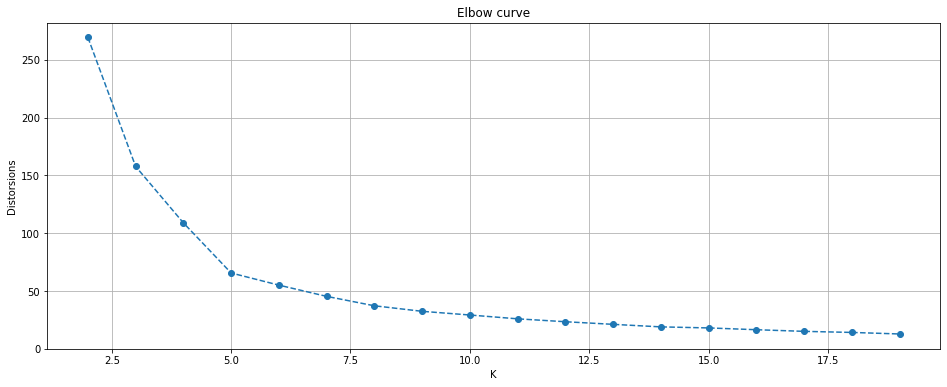

In [64]:
distorsions = []
for k in range(2, 20):
 kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10)
 kmeans.fit(scaled_new_data.iloc[:,2:])
 distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(16, 6))
plt.plot(range(2, 20), distorsions,'o--')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve')

* Here, we can see that after 5 there is no Significant drop in the values. Hence, we can conclude that the Optimum value for K is 5.

* So, 5 clusters must be there in K Means Clustering Model

####  We can also cross check the K value by Calcuating Silhoutte Score

In [65]:
from sklearn.metrics import silhouette_score

In [66]:
cluster_range = np.arange(2,10)

In [67]:
for cluster in cluster_range:
 kmeans = KMeans(n_clusters=cluster,init='k-means++',max_iter=300,n_init=10)
 kmeans.fit_predict(scaled_new_data.iloc[:,2:])
 score = silhouette_score(scaled_new_data.iloc[:,2:], kmeans.labels_, metric='euclidean')
 print(f'For cluster: {cluster} --> Silhouetter Score: %.3f' % score)


For cluster: 2 --> Silhouetter Score: 0.295
For cluster: 3 --> Silhouetter Score: 0.467
For cluster: 4 --> Silhouetter Score: 0.494
For cluster: 5 --> Silhouetter Score: 0.555
For cluster: 6 --> Silhouetter Score: 0.538
For cluster: 7 --> Silhouetter Score: 0.526
For cluster: 8 --> Silhouetter Score: 0.457
For cluster: 9 --> Silhouetter Score: 0.461


* The silhouette value is a measurement of Cohesion and Separation property i.e. how similar an object is to its own cluster compared to the other clusters.

* The Silhouette Score = 1: Clusters are well separated and dense in nature
* The Silhouette Score = 0: Clusters are not separated at all and all are misup in nature
* The Silhouette Score = 0.5: Clusters are not separated well enough, the cluster density is medium

### Model Building

In [68]:
km_model = KMeans(n_clusters=5)
km_model.fit(mc)

KMeans(n_clusters=5)

### Labeling the data points as per Cluster Number

In [69]:
labels = km_model.fit_predict(scaled_new_data.iloc[:,2:])
labels

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [1]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(x=mc.iloc[:,1],y=mc.iloc[:,2],hue=labels, palette=sns.color_palette('bright',5))
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.title('Kmeans Clustering')
plt.show()


NameError: name 'plt' is not defined

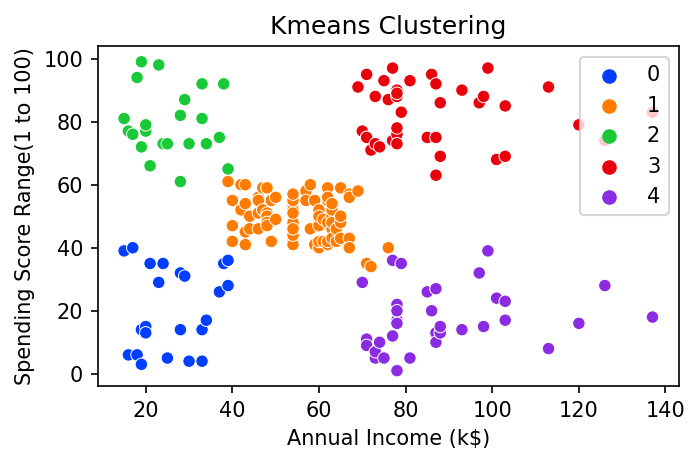

In [70]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(x=mc.iloc[:,2],y=mc.iloc[:,3],hue=labels, palette=sns.color_palette('bright',5))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score Range(1 to 100)')
plt.legend()
plt.title('Kmeans Clustering')
plt.show()


# 2. DBSCAN Model: 

##### DBSCAN - Density-Based Spatial Clustering of Applications with Noise 
* It groups ‘densely grouped’ data points into a single cluster. 
* The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.
* DBSCAN creates a circle of epsilon radius around every data point and classifies them into Core point, Border point, and Noise.

In [71]:
from sklearn.neighbors import NearestNeighbors

In [72]:
neighbour = NearestNeighbors(n_neighbors=6)
nbrs = neighbour.fit(scaled_new_data.iloc[:,2:])
distances, indices = nbrs.kneighbors(scaled_new_data.iloc[:,2:])

#### K-Distance Graph

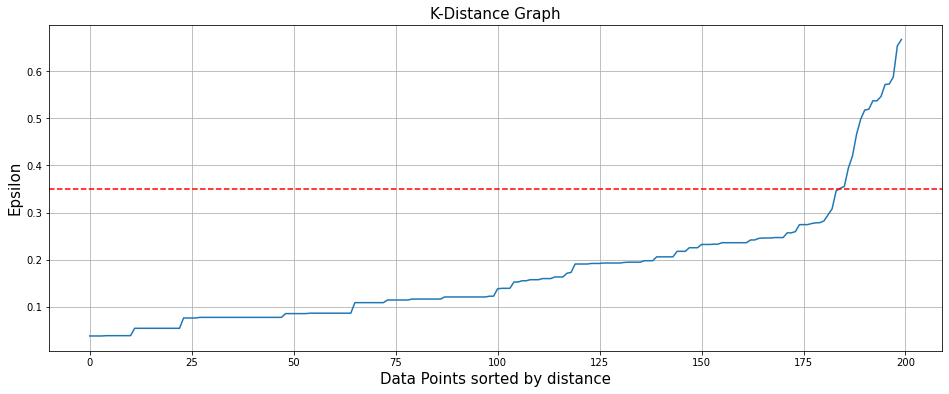

In [73]:
distances = np.sort(distances, axis=0)
distances = distances[:,2]
plt.figure(figsize=(16,6))
plt.plot(distances)
plt.axhline(y=0.35, color='r', linestyle='--')
plt.title('K-Distance Graph',fontsize=15)
plt.xlabel('Data Points sorted by distance',fontsize=15)
plt.ylabel('Epsilon',fontsize=15)
plt.grid(True)
plt.show()

In [74]:
# using hyper parameter calculating no of min_samples
eps=0.5
for min_samples in range(0,25):
 model=DBSCAN(eps=eps,min_samples=min_samples)
 cluster_labels = model.fit_predict(scaled_new_data.iloc[:,2:])
 x= cluster_labels +2
 y = np.bincount(x)
 ii = np.nonzero(y)[0]
 results = list(zip(ii,y[ii]) )
 print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 0.5 | min_samples=  0 | obtained clustering:  [(2, 157), (3, 36), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1)]
eps= 0.5 | min_samples=  1 | obtained clustering:  [(2, 157), (3, 36), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1)]
eps= 0.5 | min_samples=  2 | obtained clustering:  [(1, 3), (2, 157), (3, 36), (4, 2), (5, 2)]
eps= 0.5 | min_samples=  3 | obtained clustering:  [(1, 7), (2, 157), (3, 36)]
eps= 0.5 | min_samples=  4 | obtained clustering:  [(1, 8), (2, 157), (3, 35)]
eps= 0.5 | min_samples=  5 | obtained clustering:  [(1, 8), (2, 157), (3, 35)]
eps= 0.5 | min_samples=  6 | obtained clustering:  [(1, 11), (2, 154), (3, 35)]
eps= 0.5 | min_samples=  7 | obtained clustering:  [(1, 12), (2, 154), (3, 34)]
eps= 0.5 | min_samples=  8 | obtained clustering:  [(1, 15), (2, 151), (3, 34)]
eps= 0.5 | min_samples=  9 | obtained clustering:  [(1, 17), (2, 138), (3, 12), (4, 33)]
eps= 0.5 | min_samples=  10 | obtained clustering:  [(1, 21), (2, 109), (3, 12), (4, 32), (5, 26)]
eps= 0.5 | min_sam

#### Model Declaration:

In [75]:
dbscan_model=DBSCAN(eps=0.5,min_samples=10)
dbscan_model.fit(scaled_new_data.iloc[:,2:])

DBSCAN(min_samples=10)

In [76]:
scaled_new_data['dbscan_label1']=dbscan_model.labels_
scaled_new_data['dbscan_label1'].value_counts()

 0    109
 2     32
 3     26
-1     21
 1     12
Name: dbscan_label1, dtype: int64

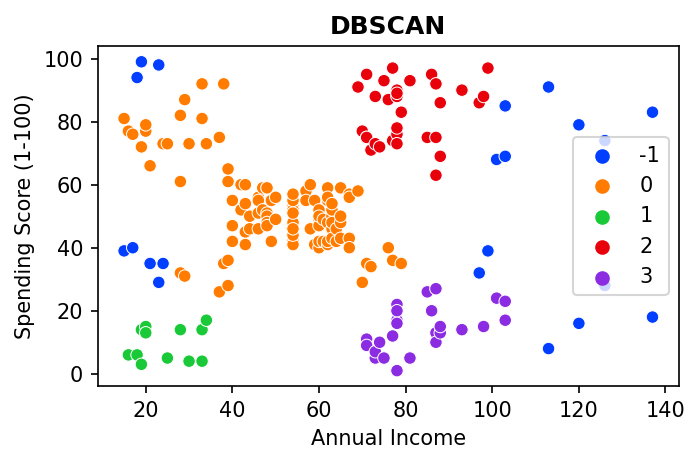

In [78]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(x=mc.iloc[:,2],y=mc.iloc[:,3],hue=dbscan_model.labels_,palette=sns.color_palette('bright',5))
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.title('DBSCAN',fontweight='bold',size=12)
plt.show()

* Here -1 marked cluster data points represnt the Noise in the data. That is marked by Deep Blue color.
* Although all the data points included in Noise should not be included in that. Those should have been included in other clusters as well. 
 

##### Hence, the clusters are not built like K-Means clusters.

# 3. Agglomerative Cluster

In [79]:
import scipy.cluster.hierarchy as sc

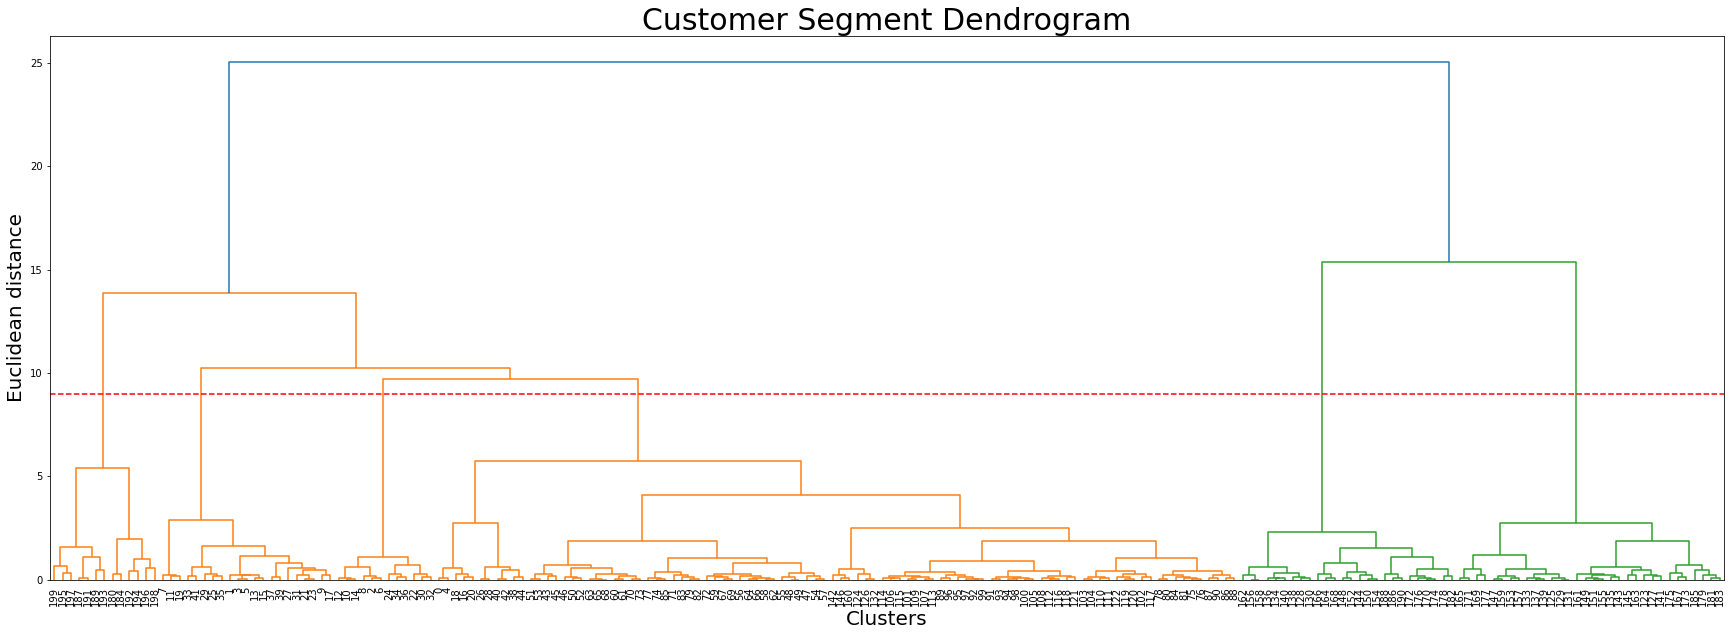

In [80]:
plt.figure(figsize=(30, 10))
dendrogrm = sc.dendrogram(sc.linkage(scaled_new_data.iloc[:,2:], method = 'ward'))
plt.axhline(y=9.0, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Segment Dendrogram',fontsize=30)
plt.xlabel('Clusters',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [81]:
#### Model Declaration :

In [82]:
agg_model = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
agg_model_cluster = agg_model.fit_predict(scaled_new_data.iloc[:,2:])
agg_model_cluster


array([0, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 0, 4, 0, 4,
       5, 4, 5, 4, 0, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

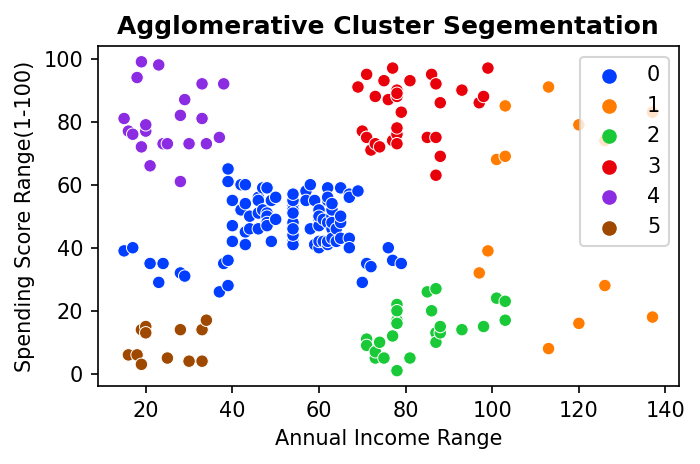

In [83]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(x=mc.iloc[:,2],y=mc.iloc[:,3],hue=agg_model_cluster,palette=sns.color_palette('bright',6))
plt.xlabel('Annual Income Range')
plt.ylabel('Spending Score Range(1-100)')
plt.legend()
plt.title('Agglomerative Cluster Segementation',fontweight='bold',size=12)
plt.show()

* Here we can see the clusters are separated well.
* But few data points should have been included in different cluster, but that has been included in other clusters. 
* Example - Few Data points for Cluster-0 should have been included in Cluster-5. And for Cluster-2 few data points have been included inthis one, but those data should have been included in Cluster1, Cluster-3 and Cluster-4.
* This shows that Agglomerative Cluster can not handle - Outliers too. 

##### Here also the clusters are not well as K-Means and DBSCAN cluster

# Considering all the 3 clusters we can say that the K-Means Cluster is the most suitable cluster for the Customers while we are clustering them on the basis of "Annual Income Range" and "Spending Score" metrics

### Now we can separate the Customers on the basis of the Annual Income and Spending Score metrics in few categories using K-Means Clustering.

In [84]:
mc['cluster']=labels

In [86]:
mc.columns

Index(['Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score_(1-100)',
       'cluster'],
      dtype='object')

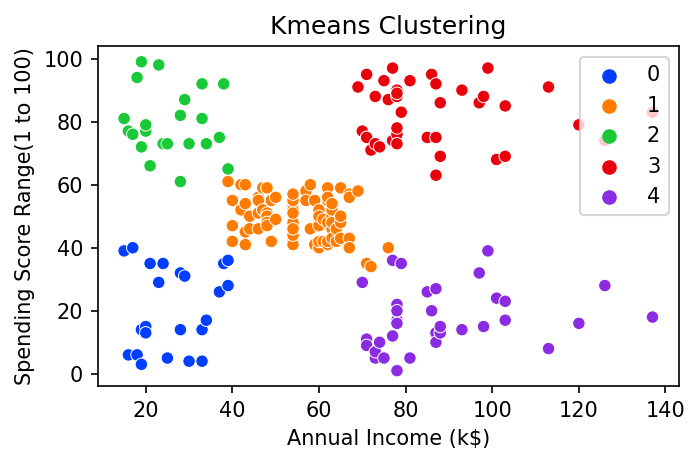

In [88]:
plt.figure(figsize=(5,3),dpi=150)
sns.scatterplot(x=mc.iloc[:,2],y=mc.iloc[:,3],hue=labels, palette=sns.color_palette('bright',5))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score Range(1 to 100)')
plt.legend()
plt.title('Kmeans Clustering')
plt.show()

In [90]:
for cluster in mc.cluster.unique():
    if cluster == 0 : name = "Cluster No = 0 : Low Income - Low Spending group - Least valuable customers"
    elif cluster == 1 : name = 'Cluster No = 1 :  Moderate/Average Income - Moderate/Average Spening group'
    elif cluster == 2 : name = 'Cluster No = 2 :  Low Income - High Spending group'
    elif cluster == 3 : name = 'Cluster No = 3 :  High Income - High Spening group - Most Valuable Customers'
    elif cluster == 4 : name = 'Cluster No = 4 :  High Income - Low Spending group'
    segement = mc[mc.cluster == cluster]['Spending_Score_(1-100)']
    print(f'{name} :\n {segement.unique()}\n')
    



Cluster No = 0 : Low Income - Low Spending group - Least valuable customers :
 [39  6 40  3 14 15 13 35 29  5 32 31  4 17 26 36 28]

Cluster No = 2 :  Low Income - High Spending group :
 [81 77 76 94 72 99 79 66 98 73 82 61 87 92 75 65]

Cluster No = 1 :  Moderate/Average Income - Moderate/Average Spening group :
 [61 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49 53 44 57 58 40 43 35 34]

Cluster No = 3 :  High Income - High Spening group - Most Valuable Customers :
 [91 77 95 75 71 88 73 72 93 87 97 74 90 76 89 78 83 63 92 86 69 68 85 79]

Cluster No = 4 :  High Income - Low Spending group :
 [29 11  9  5  7 10 12 36 22 17 20 16  1 35 26 27 13 15 14 32 39 24 23  8
 28 18]

